In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import math 
import statistics
import matplotlib.pyplot as plt
import dask.dataframe as dd
import os
import seaborn as sns
import pylab as pl
#from run_3rd.py import path

4.114163
0.0
2.4690917508025705
0.07451037076158672 
 0.27296587838333697


No handles with labels found to put in legend.


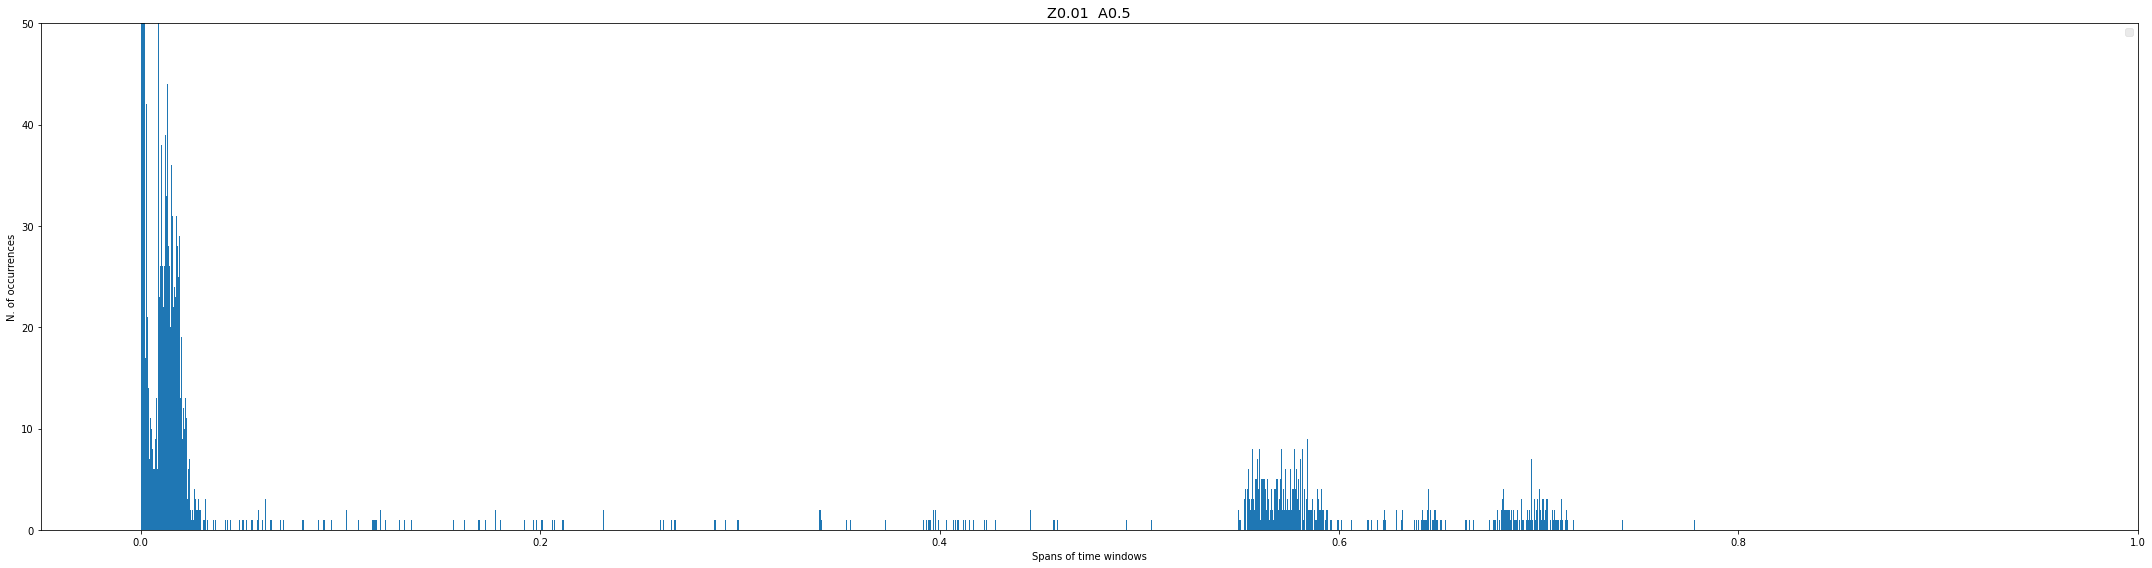

KeyboardInterrupt: 

In [9]:
plt.rcParams["figure.figsize"] = [10., 8.]
plt.rcParams["figure.autolayout"] = True
#pd.set_option('display.max_columns', None)

path = "Joined_data/"

metallicity = [0.01, 0.02, 0.014, 0.016]
alpha = [0.5, 1, 3]

for i in metallicity :
    for j in alpha :
        df = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/FZ"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df1 = df[['ID', 'BWorldtime']]
        np.array([])
        #df.loc[df['BWorldtime'] == value]
        #df.loc[df['BWorldtime'].isin(a)]
        a = df['ID'].unique().tolist()
        #print(type(a))
        b = []
        for value in a:
            #print(df1.loc[df['ID'] == value])
            df2=df1.loc[df['ID'] == value]
            mx=df2['BWorldtime'].max()
            mn=df2['BWorldtime'].min()
            #print(mn,mx)
            span=mx-mn
            #print(span)
            #print(a.index(value))
            b.append(span)
        #print(b)   
        print("max",max(b))
        print("min",min(b))
        print ("skew",skew(b)) #data are not normally distributed
        variance = statistics.variance(b, xbar=None) #variance
        std_dev = statistics.stdev(b) #std.dev
        print("variances",variance)
        print("std dev",std_dev)
        wbin = 1/len(b)
        nbins = np.arange(min(b), max(b) + wbin, wbin)
        
        plt.hist(b, bins = nbins, histtype='bar', align='mid', color=None, label=None)
        plt.xlim(-0.05, 1)
        plt.ylim(0, 50)
        plt.style.use('ggplot')
        plt.legend()
        pl.title("Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.ylabel('N. of occurrences')
        plt.xlabel('Spans of time windows')
        plt.show()
        
        plt.hist(b, bins=nbins)
        pl.title("Z"+"{}".format(i)+"  "+"A"+"{}".format(j)+"(log scale)")
        plt.xscale('log')
        plt.show()

#### BWorldTime
We studied the average time span in which binary systems check the conditions of the filter.
We avoided to study the single systems many time by compounding the data over a single system in the "time span" array.

Only a little fraction of lifetime meet the condition, and where is larger we have more time to observe the system evolution.

In [ ]:
for i in metallicity :
    for j in alpha :
        df = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/FZ"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df_start = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/init_Z"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        
        df_start.sort_values(by='#ID')
        #df_start.rename(columns = {'#ID':'ID'}, inplace = True)
        df_3=df.merge(df_start, how='left', left_on='ID', right_on='ID')
        #df.join(df_start.set_index('#ID'), on='ID')
        #df_start.join(df.set_index('ID'), on='#ID', lsuffix='_evolved', rsuffix='_output')
        
        c = df_3['ID'].unique().tolist()
        print(len(c))
        df_3un = df_3.drop_duplicates(subset=['ID'])
        
        #max_Mass_0_y = df_3un.loc[df_3un["Mass_0_y"].idxmax()]
        #mim_Mass_0_y = df_3un.loc[df_3un["Mass_0_y"].idxmin()]
        #print(max_Mass_0_y, mim_Mass_0_y)
        df_3un.hist(column="Mass_0_y", bins=110, grid=False)
        pl.title("Histogram of masses_0 (init)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        pl.xlabel("Masses [Msun]")
        pl.ylabel("Occurrences")
        
        df_3un.hist(column="Mass_1_y", bins=110, grid=False)
        pl.title("Histogram of masses_1 (init)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        pl.xlabel("Masses [Msun]")
        pl.ylabel("Occurrences")
        
        #convert column in array
        Mass_0_y = df_3un['Mass_0_y'].to_numpy()
        Mass_1_y = df_3un['Mass_1_y'].to_numpy()
        
        plt.hist(Mass_0_y, bins=110, label=0)
        plt.hist(Mass_1_y, bins=110, label=1)
        # Plot formatting
        plt.legend(prop={'size': 12})
        plt.title("Histogram of object masses (init)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Masses [Msun]")
        plt.ylabel("Occurrences")
        plt.show()
        
        #convert column in array
        Mass_0_x = df_3['Mass_0_x'].to_numpy()
        Mass_1_x = df_3['Mass_1_x'].to_numpy()

        plt.hist(Mass_0_x, bins=20)
        plt.legend(prop={'size': 12})
        plt.title("Histogram of masses_0 (outp)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Masses [Msun]")
        plt.ylabel("Occurrences")
        plt.show()
        
        plt.hist(Mass_1_x, bins=110)
        plt.legend(prop={'size': 12})
        plt.title("Histogram of masses_1 (outp)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Masses [Msun]")
        plt.ylabel("Occurrences")
        plt.show()
        
        plt.hist(Mass_0_x, bins=110, label=0)
        plt.hist(Mass_1_x, bins=110, label=1)
        # Plot formatting
        plt.legend(prop={'size': 12})
        plt.title("Histogram of object masses (outp)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Masses [Msun]")
        plt.ylabel("Occurrences")
        plt.show()
        
        

#### Mass distribution
We plotted the distribution of masses of the stars and compact objects in 1d and 2d histograms, checking for differences between initial distributions and output distributions.

#### Remnant type of the second object
is it always zero? yes, probably because the second object is always the less massive one at start, so it is always a donor of mass.

In [ ]:
for i in metallicity :
    for j in alpha :
        df = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/FZ"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df_start = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/init_Z"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df_start.sort_values(by='#ID')
        #df_start.rename(columns = {'#ID':'ID'}, inplace = True)
        df_3=df.merge(df_start, how='left', left_on='ID', right_on='ID')
        #df.join(df_start.set_index('#ID'), on='ID')
        #df_start.join(df.set_index('ID'), on='#ID', lsuffix='_evolved', rsuffix='_output')
        
        c = df_3['ID'].unique().tolist()
        print(len(c))
        df_3un = df_3.drop_duplicates(subset=['ID'])
        
        print("Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        
        s_0 = df_start[df_start["Mass_0"]<df_start["Mass_1"]] #print size of the dataframe to check when the compact object (less massive) is the first one
        print("systems where compact object is the the first one ", s_0.size)
        
        s_1 = df_start[df_start["Mass_0"]>df_start["Mass_1"]]
        print("systems where compact object is the the second one ", s_1.size)
        
        s_2 = df[df["Mass_0"]<df["Mass_1"]] 
        print("systems where compact object is the the first one ", s_2.size)
        
        s_3 = df[df["Mass_0"]>df["Mass_1"]]
        print("systems where compact object is the the second one ", s_3.size)
        
        df[df["RemnantType_1"]!=0] #check if remnant type of 1_object differs from 0
        
        #check remnant type for 0_object
        df[df["RemnantType_0"]==4]
        df[df["RemnantType_0"]==5]
        df[df["RemnantType_0"]==6]
        
        #some 2dplots with seaborn and matplotlib
        sns.color_palette("vlag", as_cmap=True)

        for k in ['Semimajor', 'Period', 'Eccentricity','RL0','RL1','BWorldtime']:
            for n in ['Semimajor', 'Period', 'Eccentricity','RL0','RL1','BWorldtime']:
                if k != n:
                        #sns.scatterplot(data=df, x=i, y=j, hue="ID").set(title= j + "vs" + i)
                        sns.jointplot(data=df, x=k, y=n, hue="RemnantType_0")
                else:
                    continue
                    
        for k in ["Mass_0_x","Mass_1_x"]:
            for n in ['Semimajor', 'Period', 'Eccentricity','RL0','RL1','BWorldtime']:
                if k != n:
                        _i_ = df_3[k].to_numpy()
                        _j_ = df_3[n].to_numpy()
                        plt.hist2d(_i_, _j_)
                        #plt.legend(prop={'size': 12})
                        plt.title(k+" vs "+n +"Z"+"{}".format(i)+"  "+"A"+"{}".format(j) )
                        plt.xlabel(k)
                        plt.ylabel(m)
                        plt.show()

                else:
                    continue
                
                for k in ['Semimajor']:
                    for n in ['Eccentricity']:
                        if k != n:
                                _i_ = df_3[k].to_numpy()
                                _j_ = df_3[n].to_numpy()
                                plt.hist2d(_i_, _j_)
                                #plt.legend(prop={'size': 12})
                                plt.title(k+" vs "+n+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
                                plt.xlabel(k)
                                plt.ylabel(n)
                                plt.show()
                        else:
                            continue

#### Phases distribution of the stars over the BWorldTime

In [ ]:
for i in metallicity :
    for j in alpha :
        df = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/FZ"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df_start = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/init_Z"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df_start.sort_values(by='#ID')
        #df_start.rename(columns = {'#ID':'ID'}, inplace = True)
        df_3=df.merge(df_start, how='left', left_on='ID', right_on='ID')
        #df.join(df_start.set_index('#ID'), on='ID')
        #df_start.join(df.set_index('ID'), on='#ID', lsuffix='_evolved', rsuffix='_output')
        
        c = df_3['ID'].unique().tolist()
        print(len(c))
        df_3un = df_3.drop_duplicates(subset=['ID'])
        
         for k in ['BWorldtime']:
                    for n in ['Phase_0']:
                        if k != n:
                                _i_ = df_3[k].to_numpy()
                                _j_ = df_3[n].to_numpy()
                                plt.hist2d(_i_, _j_)
                                #plt.legend(prop={'size': 12})
                                plt.title(k+" vs "+n+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
                                plt.xlabel(k)
                                plt.ylabel(n)
                                plt.show()
                        else:
                            continue
            
            
        for k in ['BWorldtime']:
                for n in ['Phase_1']:
                    if k != n:
                            _i_ = df_3[k].to_numpy()
                            _j_ = df_3[n].to_numpy()
                            plt.hist2d(_i_, _j_)
                            #plt.legend(prop={'size': 12})
                            plt.title(k+" vs "+n+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
                            plt.xlabel(k)
                            plt.ylabel(n)
                            plt.show()
                    else:
                        continue

#### Plot semimajor axes distributions


In [ ]:
for i in metallicity :
    for j in alpha :
        df = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/FZ"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df_start = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/init_Z"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        
        df_start.sort_values(by='#ID')
        #df_start.rename(columns = {'#ID':'ID'}, inplace = True)
        df_3=df.merge(df_start, how='left', left_on='ID', right_on='ID')
        #df.join(df_start.set_index('#ID'), on='ID')
        #df_start.join(df.set_index('ID'), on='#ID', lsuffix='_evolved', rsuffix='_output')
        
        c = df_3['ID'].unique().tolist()
        print(len(c))
        df_3un = df_3.drop_duplicates(subset=['ID'])
        
        #convert column in array
        semimajor = df_3['Semimajor'].to_numpy()
        eccentricity = df_3['Eccentricity'].to_numpy()

        plt.hist(semimajor,bins=50)
        # Plot formatting
        plt.legend(prop={'size': 12})
        plt.title("Semimajor axes distribution"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Semimajor")
        plt.ylabel("Occurrences")
        plt.show()

        plt.hist(eccentricity,bins=50)
        # Plot formatting
        plt.legend(prop={'size': 12})
        plt.title("Eccentricities distribution"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Eccentricity")
        plt.ylabel("Occurrences")
        plt.xscale('log')
        plt.show()
        
        #convert column in array
        a = df_3un['a'].to_numpy()
        e = df_3un['e'].to_numpy()
        a = a[np.logical_not(np.isnan(a))]
        e = e[np.logical_not(np.isnan(e))]

        plt.hist(a,bins=50)
        # Plot formatting
        plt.legend(prop={'size': 12})
        plt.title("Semimajor axes distribution (init)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Semimajor")
        plt.ylabel("Occurrences")
        plt.show()

        plt.hist(e,bins=50)
        # Plot formatting
        plt.legend(prop={'size': 12})
        plt.title("Eccentricities distribution (init)"+"Z"+"{}".format(i)+"  "+"A"+"{}".format(j))
        plt.xlabel("Eccentricity")
        plt.ylabel("Occurrences")
        plt.show()
        
        #check for loose systems
        df_loose = df_3.loc[df_3['Semimajor'] >= 500]
        df_loose
